## Contents
#### 1. Import libraries and cleaned data
#### 2. Data cleaning 
#### 3. Elbow technique
#### 4. Number of clusters 
#### 5. k-means algorithm
#### 6. Adding new columns
#### 7. Visualisations 
#### 8. Discussing results
#### 9. descriptive statistics ang grouping
#### 10. Future discussion
#### 11. Additional wrangling 

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
path = r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement6\Achievement6-Project\Data\Prepared Data'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Air_Traffic_Cargo_Statistics_cleaned.pkl'))

In [4]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,last_update,upload_date
0,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,20-11-2023 07:01,20-11-2023 07:02
1,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,20-11-2023 07:01,20-11-2023 07:02
2,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,20-11-2023 07:01,20-11-2023 07:02
3,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,20-11-2023 07:01,20-11-2023 07:02
4,199907,01-07-1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,20-11-2023 07:01,20-11-2023 07:02


## 2. Data cleaning

#### Since this is the cleaned data there is no need to do it again. The only thing to do is removing the categorical variables.

In [5]:
# changing data type into int64
df['Activity Period'] =  df['Activity Period'].astype('int64')

In [6]:
# create a subset with only numerical variables
df_sub = df[['Activity Period', 'Cargo Weight LBS', 'Cargo Metric TONS']]

In [7]:
df_sub.head()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS
0,199907,349048,158.328173
1,199907,122003,55.340561
2,199907,514450,233.354520
3,199907,89776,40.722394
4,199907,13086,5.935810


## 3. Using the elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
# a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]
score

C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christian\anaconda3\Lib\site-pa

[-5.53665987485348e+16,
 -2.178167201347333e+16,
 -1.0429838566409582e+16,
 -6155834849573194.0,
 -4080714579532245.0,
 -2893565682497327.0,
 -2182021747514556.8,
 -1738048037323755.5,
 -1393127609432724.0]

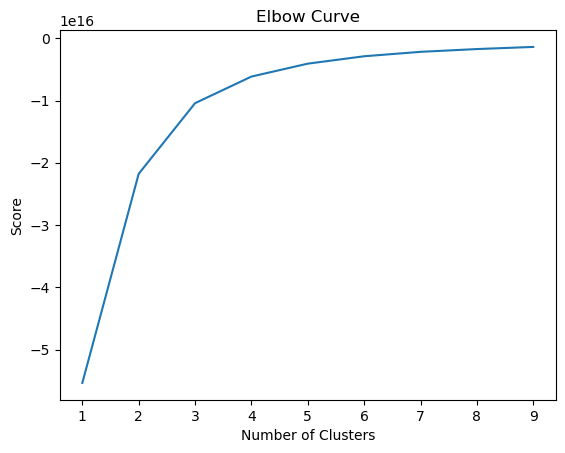

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Make a decision about the number of clusters

#### In this case the number of clusters is 4. On the x-axis form 3 to 4 there is still a visible differerence. After 4 the curve begins to flatten. There is still a little difference between 4 and 5 but 5 clusters would be too many.

## 5. Run the k-means algorithm

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## 6. Attach a new column to your dataframe with the resulting clusters

In [13]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\Christian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christian\AppData\Local\Temp\ipykernel_20448\4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [14]:
df_sub.head()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS,clusters
0,199907,349048,158.328173,0
1,199907,122003,55.340561,0
2,199907,514450,233.354520,0
3,199907,89776,40.722394,0
4,199907,13086,5.935810,0


In [15]:
df_sub['clusters'].value_counts()

clusters
0    40902
2     9919
1     2511
3      540
Name: count, dtype: int64

## 7. Create visualizations

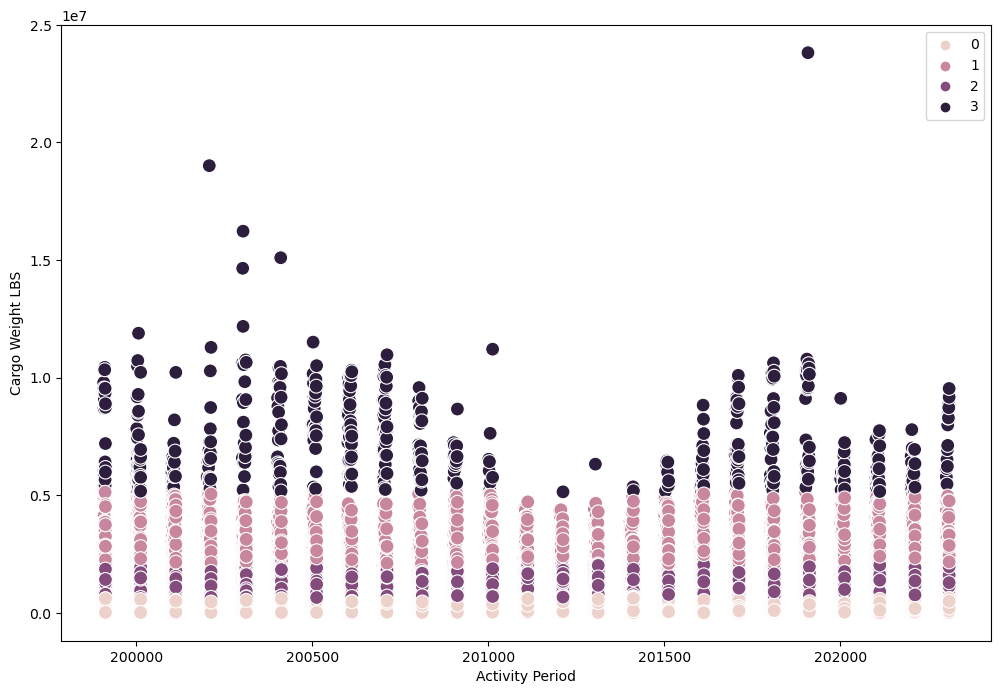

In [16]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Activity Period'], y=df_sub['Cargo Weight LBS'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Activity Period') # Label x-axis.
plt.ylabel('Cargo Weight LBS') # Label y-axis.
plt.show()

## 8. Discuss how and why the clusters make sense

#### The cargo weights were subdivided into 4 categories which makes sense because in reality there are different cargo weight categories. This helps choosing the proper aircraft for the right kind of cargo. 

In [17]:
# name the clusters
df_sub.loc[df_sub['clusters'] == 3, 'Weight Category'] = 'ultra high'
df_sub.loc[df_sub['clusters'] == 2, 'Weight Category'] = 'low'
df_sub.loc[df_sub['clusters'] == 1, 'Weight Category'] = 'high'
df_sub.loc[df_sub['clusters'] == 0, 'Weight Category'] = 'ultra low'

C:\Users\Christian\AppData\Local\Temp\ipykernel_20448\1513627153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 3, 'Weight Category'] = 'ultra high'


## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

In [18]:
df_sub.groupby('Weight Category').agg({'Cargo Weight LBS':['min', 'max', 'mean', 'median']})

Cargo Weight LBS                                   
                             min       max          mean     median
Weight Category                                                    
high                     2044507   5126089  2.982282e+06  2740317.0
low                       621090   2043495  1.103505e+06   998027.0
ultra high               5139818  23812342  7.271796e+06  6651472.5
ultra low                      1    620919  1.372198e+05    58070.0

#### The statistical values above help categorizing the cargo weight. 
#### In the future based on these values logistic companies and airlines can make better decision in categorizing the cargo in in combination with the other categorical variables select the proper aircraft.

## 10. Propose what these results could be useful for in future steps of an analytics pipeline

#### In the future these results could help analysing the devlopment of the cargo transport of the 4 weight categories and making predictions for the future.
#### For example, the scatterplot above shows that in recent years there were less ultra high cargo transports than at the beginning of the millennium. 

## 11. Additional wrangling 

In [19]:
df_sub.head()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS,clusters,Weight Category
0,199907,349048,158.328173,0,ultra low
1,199907,122003,55.340561,0,ultra low
2,199907,514450,233.354520,0,ultra low
3,199907,89776,40.722394,0,ultra low
4,199907,13086,5.935810,0,ultra low


In [20]:
df_sub.drop(columns=['clusters'])

,Activity Period,Cargo Weight LBS,Cargo Metric TONS,Weight Category
0,199907,349048,158.328173,ultra low
1,199907,122003,55.340561,ultra low
2,199907,514450,233.354520,ultra low
3,199907,89776,40.722394,ultra low
4,199907,13086,5.935810,ultra low
...,...,...,...,...
53867,202309,265897,120.610879,ultra low
53868,202309,77518,35.162165,ultra low
53869,202309,212137,96.225343,ultra low
53870,202309,196029,88.918754,ultra low


In [24]:
weight = df_sub['Weight Category']

In [25]:
df['Weight Category'] = weight 

In [26]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,last_update,upload_date,Weight Category
0,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,20-11-2023 07:01,20-11-2023 07:02,ultra low
1,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,20-11-2023 07:01,20-11-2023 07:02,ultra low
2,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,20-11-2023 07:01,20-11-2023 07:02,ultra low
3,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,20-11-2023 07:01,20-11-2023 07:02,ultra low
4,199907,01-07-1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,20-11-2023 07:01,20-11-2023 07:02,ultra low


In [29]:
df.to_csv(r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement6\Achievement6-Project\Data\Prepared Data\air_cargo_weight.csv')